# Google Dorking Queries for Commercial Vehicle PDFs

### First Attempt
- `site:discover.jdpa.com/hubfs/Files filetype:pdf intitle:"COMMERCIAL VEHICLE"`
- `site:discover.jdpa.com/hubfs/Files filetype:pdf intitle:"COMMERCIAL TRUCK"`
- `site:https://cdn2.hubspot.net/ filetype:pdf intitle:"COMMERCIAL TRUCK"`

In [266]:
import pandas as pd

# Load the CSV file
truck_market_dates = pd.read_csv(r'C:\Users\clint\Desktop\Scraping Task\1.csv')

links_available=truck_market_dates

In [267]:
links_available.rename(columns={'Link': 'Official Link'}, inplace=True)
links_available

,Official Link,Month,Year
0,https://www.jdpowervalues.com/article/market-c...,November,2022
1,https://www.jdpowervalues.com/article/class-8-...,January,2023
2,https://www.jdpowervalues.com/article/market-a...,June,2022
3,https://www.jdpowervalues.com/article/early-fe...,February,2022
4,https://www.jdpowervalues.com/article/more-ret...,February,2021
5,https://www.jdpowervalues.com/article/summer-c...,September,2021
6,https://www.jdpowervalues.com/article/uncertai...,March,2023
7,https://www.jdpowervalues.com/article/december...,December,2022
8,https://www.jdpowervalues.com/article/2021-was...,January,2022
9,https://www.jdpowervalues.com/article/class-8-...,March,2022


In [268]:
links_available['Dorking Links'] = None  # Initialize the new column with None or any default value
links_available

,Official Link,Month,Year,Dorking Links
0,https://www.jdpowervalues.com/article/market-c...,November,2022,None
1,https://www.jdpowervalues.com/article/class-8-...,January,2023,None
2,https://www.jdpowervalues.com/article/market-a...,June,2022,None
3,https://www.jdpowervalues.com/article/early-fe...,February,2022,None
4,https://www.jdpowervalues.com/article/more-ret...,February,2021,None
5,https://www.jdpowervalues.com/article/summer-c...,September,2021,None
6,https://www.jdpowervalues.com/article/uncertai...,March,2023,None
7,https://www.jdpowervalues.com/article/december...,December,2022,None
8,https://www.jdpowervalues.com/article/2021-was...,January,2022,None
9,https://www.jdpowervalues.com/article/class-8-...,March,2022,None


In [269]:
import pandas as pd
from datetime import datetime

# Dictionary to map abbreviated month names to full month names
month_mapping = {
    'Jan': 'January', 'Jan': 'January',
    'Feb': 'February', 'Feb': 'February',
    'Mar': 'March', 'Mar': 'March',
    'Apr': 'April', 'Apr': 'April',
    'May': 'May', 
    'Jun': 'June', 'Jun': 'June',
    'Jul': 'July', 'Jul': 'July',
    'Aug': 'August', 'Aug': 'August',
    'Sep': 'September', 'Sept.': 'September', 'Sep': 'September', 'Sept': 'September',
    'Oct': 'October', 'Oct': 'October',
    'Nov': 'November', 'Nov': 'November',
    'Dec': 'December', 'Dec': 'December',
}

# Convert Month and Year to a single datetime column
def convert_to_datetime(row):
    try:
        # Get month name and standardize it
        month_str = row['Month']
        
        # If month is abbreviated, convert to full name
        if month_str in month_mapping:
            month_str = month_mapping[month_str]
        
        # Parse the date using datetime
        date_str = f"{month_str} 1, {row['Year']}"
        return pd.to_datetime(date_str, format="%B %d, %Y")
    except:
        return pd.NaT  # Return Not a Time for any errors

# Create the new Date column
links_available['Date'] = links_available.apply(convert_to_datetime, axis=1)

# Show the updated dataframe
links_available

,Official Link,Month,Year,Dorking Links,Date
0,https://www.jdpowervalues.com/article/market-c...,November,2022,None,2022-11-01
1,https://www.jdpowervalues.com/article/class-8-...,January,2023,None,2023-01-01
2,https://www.jdpowervalues.com/article/market-a...,June,2022,None,2022-06-01
3,https://www.jdpowervalues.com/article/early-fe...,February,2022,None,2022-02-01
4,https://www.jdpowervalues.com/article/more-ret...,February,2021,None,2021-02-01
5,https://www.jdpowervalues.com/article/summer-c...,September,2021,None,2021-09-01
6,https://www.jdpowervalues.com/article/uncertai...,March,2023,None,2023-03-01
7,https://www.jdpowervalues.com/article/december...,December,2022,None,2022-12-01
8,https://www.jdpowervalues.com/article/2021-was...,January,2022,None,2022-01-01
9,https://www.jdpowervalues.com/article/class-8-...,March,2022,None,2022-03-01


In [270]:
data_2 = pd.read_csv(r'C:\Users\clint\Desktop\Scraping Task\2_1.csv')
data_2.rename(columns={'month': 'Month', 'year': 'Year'}, inplace=True)
data_2['Date'] = data_2.apply(convert_to_datetime, axis=1)
data_2

,title,link,page,Month,Year,Date
0,COMMERCIAL TRUCK GUIDELINES,https://discover.jdpa.com/hubfs/Files/Industry...,1,Dec,2021,2021-12-01
1,COMMERCIAL TRUCK GUIDELINES,https://discover.jdpa.com/hubfs/Files/Industry...,1,Apr,2021,2021-04-01
2,COMMERCIAL TRUCK GUIDELINES,https://discover.jdpa.com/hubfs/Files/Industry...,1,Jun,2020,2020-06-01
3,COMMERCIAL TRUCK GUIDELINES,https://discover.jdpa.com/hubfs/Files/Industry...,1,Sep,2020,2020-09-01
4,COMMERCIAL TRUCK GUIDELINES,https://discover.jdpa.com/hubfs/Files/Industry...,1,Oct,2021,2021-10-01
5,COMMERCIAL TRUCK GUIDELINES,https://discover.jdpa.com/hubfs/Files/Industry...,1,Feb,2021,2021-02-01
6,COMMERCIAL TRUCK GUIDELINES,https://discover.jdpa.com/hubfs/Files/Industry...,1,Jan,2021,2021-01-01
7,COMMERCIAL TRUCK GUIDELINES,https://discover.jdpa.com/hubfs/Files/Industry...,1,Jul,2020,2020-07-01
8,COMMERCIAL TRUCK GUIDELINES,https://discover.jdpa.com/hubfs/Files/Industry...,1,Nov,2021,2021-11-01
9,COMMERCIAL TRUCK GUIDELINES,https://discover.jdpa.com/hubfs/Files/Industry...,2,Sep,2021,2021-09-01


In [271]:
data_3= pd.read_csv(r'C:\Users\clint\Desktop\Scraping Task\2_2.csv')
data_3.rename(columns={'month': 'Month', 'year': 'Year'}, inplace=True)
data_3['Date'] = data_3.apply(convert_to_datetime, axis=1)

In [272]:
data_3

,title,link,page,Month,Year,Date
0,COMMERCIAL TRUCK GUIDELINES,https://cdn2.hubspot.net/hubfs/4239280/Files/I...,1,Jul,2019,2019-07-01
1,COMMERCIAL TRUCK GUIDELINES,https://cdn2.hubspot.net/hubfs/4239280/Files/I...,1,Nov,2019,2019-11-01
2,COMMERCIAL TRUCK GUIDELINES,https://cdn2.hubspot.net/hubfs/4239280/Files/I...,1,Apr,2020,2020-04-01
3,COMMERCIAL TRUCK GUIDELINES,https://cdn2.hubspot.net/hubfs/4239280/03.2019...,1,Mar,2019,2019-03-01
4,COMMERCIAL TRUCK GUIDELINES,https://cdn2.hubspot.net/hubfs/4239280/06.2019...,1,Jun,2019,2019-06-01
5,COMMERCIAL TRUCK GUIDELINES,https://cdn2.hubspot.net/hubfs/4239280/Files/I...,1,Oct,2019,2019-10-01
6,COMMERCIAL TRUCK GUIDELINES,https://cdn2.hubspot.net/hubfs/4239280/Files/I...,1,Apr,2019,2019-04-01
7,COMMERCIAL TRUCK GUIDELINES,https://cdn2.hubspot.net/hubfs/4239280/Files/I...,1,Mar,2020,2020-03-01
8,COMMERCIAL TRUCK GUIDELINES,https://cdn2.hubspot.net/hubfs/4239280/Files/I...,1,Aug,2019,2019-08-01
9,COMMERCIAL TRUCK GUIDELINES,https://cdn2.hubspot.net/hubfs/4239280/Files/I...,2,Jan,2020,2020-01-01


first link stops at march 2023

In [273]:
data_4 = pd.read_csv(r'C:\Users\clint\Desktop\Scraping Task\2_3.csv')
data_4.rename(columns={'month': 'Month', 'year': 'Year'}, inplace=True)
data_4['Date'] = data_4.apply(convert_to_datetime, axis=1)


In [274]:
data_4

,title,link,page,Month,Year,Date
0,COMMERCIAL VEHICLE GUIDELINES,https://discover.jdpa.com/hubfs/Files/Industry...,1,Jun,2024,2024-06-01
1,COMMERCIAL VEHICLE GUIDELINES,https://discover.jdpa.com/hubfs/Files/Industry...,1,May,2024,2024-05-01
2,COMMERCIAL VEHICLE GUIDELINES,https://discover.jdpa.com/hubfs/Files/Industry...,1,Sep,2024,2024-09-01
3,COMMERCIAL VEHICLE GUIDELINES,https://discover.jdpa.com/hubfs/Files/Industry...,1,Aug,2024,2024-08-01
4,COMMERCIAL VEHICLE GUIDELINES,https://discover.jdpa.com/hubfs/Files/Industry...,1,Mar,2025,2025-03-01
5,COMMERCIAL VEHICLE GUIDELINES,https://discover.jdpa.com/hubfs/Files/Industry...,1,Mar,2024,2024-03-01
6,COMMERCIAL VEHICLE GUIDELINES,https://discover.jdpa.com/hubfs/Files/Industry...,1,Feb,2024,2024-02-01
7,COMMERCIAL VEHICLE GUIDELINES,https://discover.jdpa.com/hubfs/Files/Industry...,1,Apr,2024,2024-04-01
8,COMMERCIAL VEHICLE GUIDELINES,https://discover.jdpa.com/hubfs/Files/Industry...,1,Jan,2025,2025-01-01
9,COMMERCIAL VEHICLE GUIDELINES,https://discover.jdpa.com/hubfs/Files/Industry...,1,Jul,2024,2024-07-01


In [275]:
data_6 = pd.read_csv(r'C:\Users\clint\Desktop\Scraping Task\3_1.csv')
data_6 = data_6.iloc[:, 1:]  # Drop the first column
data_6.rename(columns={'month': 'Month', 'year': 'Year'}, inplace=True)
data_6['Date'] = data_6.apply(convert_to_datetime, axis=1)
data_6

,Month,Year,link,Date
0,September,2022,https://www.jdpowervalues.com/article/septembe...,2022-09-01
1,September,2022,https://www.jdpowervalues.com/article/septembe...,2022-09-01
2,July,2022,https://discover.jdpa.com/hubfs/Files/Industry...,2022-07-01
3,August,2022,https://discover.jdpa.com/hubfs/Files/Industry...,2022-08-01
4,March,2022,https://www.jdpowervalues.com/article/class-8-...,2022-03-01
...,...,...,...,...
132,January,2018,https://cdn2.hubspot.net/hubfs/4239280/Files/I...,2018-01-01
133,January,2018,https://cdn2.hubspot.net/hubfs/4239280/Files/I...,2018-01-01
134,January,2018,https://cdn2.hubspot.net/hubfs/4239280/Files/I...,2018-01-01
135,January,2018,https://cdn2.hubspot.net/hubfs/4239280/Files/I...,2018-01-01


In [276]:
data_6 = data_6.drop_duplicates()
data_6

,Month,Year,link,Date
0,September,2022,https://www.jdpowervalues.com/article/septembe...,2022-09-01
1,September,2022,https://www.jdpowervalues.com/article/septembe...,2022-09-01
2,July,2022,https://discover.jdpa.com/hubfs/Files/Industry...,2022-07-01
3,August,2022,https://discover.jdpa.com/hubfs/Files/Industry...,2022-08-01
4,March,2022,https://www.jdpowervalues.com/article/class-8-...,2022-03-01
...,...,...,...,...
123,March,2018,https://cdn2.hubspot.net/hubfs/4239280/Files/I...,2018-03-01
126,February,2018,https://cdn2.hubspot.net/hubfs/4239280/Files/I...,2018-02-01
130,February,2018,https://cdn2.hubspot.net/hubfs/4239280/Files/I...,2018-02-01
132,January,2018,https://cdn2.hubspot.net/hubfs/4239280/Files/I...,2018-01-01


In [277]:
# Keep the row with the highest index for each duplicate date
# First, sort by index in descending order, then drop duplicates keeping the first occurrence
data_6 = data_6.sort_index(ascending=False).drop_duplicates(subset=['Date']).sort_index()

# Display the result
data_6

,Month,Year,link,Date
1,September,2022,https://www.jdpowervalues.com/article/septembe...,2022-09-01
2,July,2022,https://discover.jdpa.com/hubfs/Files/Industry...,2022-07-01
3,August,2022,https://discover.jdpa.com/hubfs/Files/Industry...,2022-08-01
4,March,2022,https://www.jdpowervalues.com/article/class-8-...,2022-03-01
6,February,2022,https://www.jdpowervalues.com/article/early-fe...,2022-02-01
7,January,2022,https://discover.jdpa.com/hubfs/Files/Industry...,2022-01-01
12,November,2021,https://cts.businesswire.com/ct/CT?id=smartlin...,2021-11-01
15,October,2021,https://cts.businesswire.com/ct/CT?id=smartlin...,2021-10-01
18,September,2021,https://cts.businesswire.com/ct/CT?id=smartlin...,2021-09-01
20,August,2021,https://cts.businesswire.com/ct/CT?id=smartlin...,2021-08-01


In [278]:
# Combine all dataframes into one
import pandas as pd

# Create a list of all your dataframes with correct variable names
dfs = [data_2, data_3, data_4, data_6]

# Concatenate all dataframes vertically
combined_df = pd.concat(dfs, ignore_index=True)

# Display the first few rows of the combined dataframe
combined_df

,title,link,page,Month,Year,Date
0,COMMERCIAL TRUCK GUIDELINES,https://discover.jdpa.com/hubfs/Files/Industry...,1.0,Dec,2021,2021-12-01
1,COMMERCIAL TRUCK GUIDELINES,https://discover.jdpa.com/hubfs/Files/Industry...,1.0,Apr,2021,2021-04-01
2,COMMERCIAL TRUCK GUIDELINES,https://discover.jdpa.com/hubfs/Files/Industry...,1.0,Jun,2020,2020-06-01
3,COMMERCIAL TRUCK GUIDELINES,https://discover.jdpa.com/hubfs/Files/Industry...,1.0,Sep,2020,2020-09-01
4,COMMERCIAL TRUCK GUIDELINES,https://discover.jdpa.com/hubfs/Files/Industry...,1.0,Oct,2021,2021-10-01
...,...,...,...,...,...,...
110,NaN,https://cdn2.hubspot.net/hubfs/4239280/Files/I...,NaN,May,2018,2018-05-01
111,NaN,https://cdn2.hubspot.net/hubfs/4239280/Files/I...,NaN,April,2018,2018-04-01
112,NaN,https://cdn2.hubspot.net/hubfs/4239280/Files/I...,NaN,March,2018,2018-03-01
113,NaN,https://cdn2.hubspot.net/hubfs/4239280/Files/I...,NaN,February,2018,2018-02-01


In [279]:
# Check if dates in combined_df exist in links_available
# Create a new column called Is_readily_available
combined_df['Is_readily_available'] = combined_df['Date'].isin(links_available['Date']).astype(int)

# Display the first few rows to verify
combined_df

,title,link,page,Month,Year,Date,Is_readily_available
0,COMMERCIAL TRUCK GUIDELINES,https://discover.jdpa.com/hubfs/Files/Industry...,1.0,Dec,2021,2021-12-01,0
1,COMMERCIAL TRUCK GUIDELINES,https://discover.jdpa.com/hubfs/Files/Industry...,1.0,Apr,2021,2021-04-01,0
2,COMMERCIAL TRUCK GUIDELINES,https://discover.jdpa.com/hubfs/Files/Industry...,1.0,Jun,2020,2020-06-01,0
3,COMMERCIAL TRUCK GUIDELINES,https://discover.jdpa.com/hubfs/Files/Industry...,1.0,Sep,2020,2020-09-01,0
4,COMMERCIAL TRUCK GUIDELINES,https://discover.jdpa.com/hubfs/Files/Industry...,1.0,Oct,2021,2021-10-01,0
...,...,...,...,...,...,...,...
110,NaN,https://cdn2.hubspot.net/hubfs/4239280/Files/I...,NaN,May,2018,2018-05-01,0
111,NaN,https://cdn2.hubspot.net/hubfs/4239280/Files/I...,NaN,April,2018,2018-04-01,0
112,NaN,https://cdn2.hubspot.net/hubfs/4239280/Files/I...,NaN,March,2018,2018-03-01,0
113,NaN,https://cdn2.hubspot.net/hubfs/4239280/Files/I...,NaN,February,2018,2018-02-01,0


In [280]:
combined_df.to_csv('combined_data.csv', index=False)

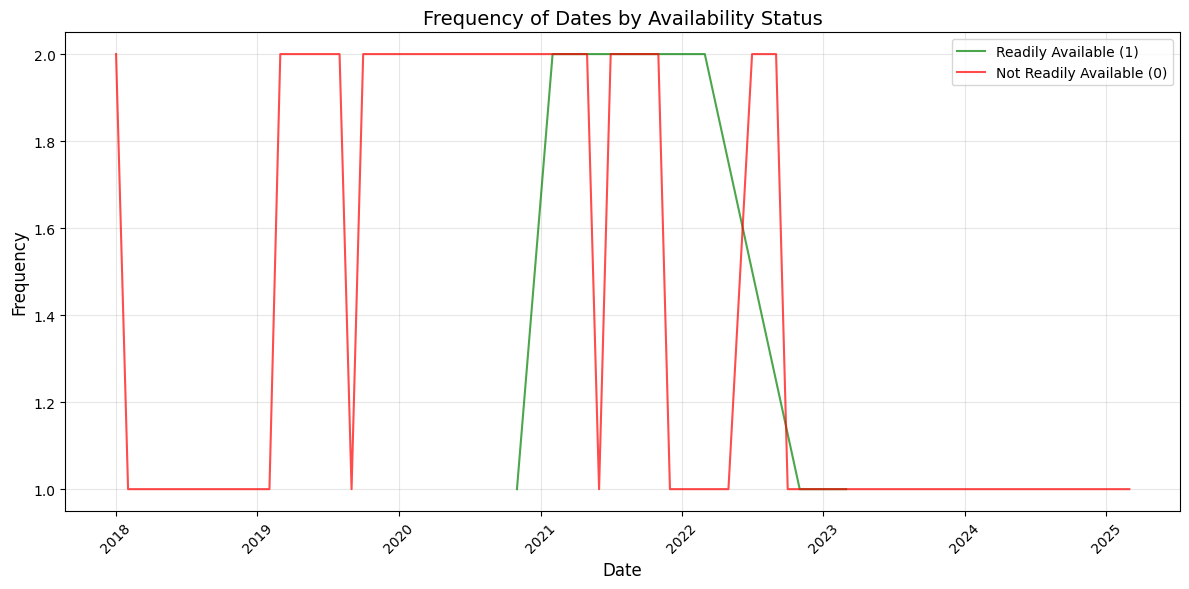

In [281]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a figure with a specific size
plt.figure(figsize=(12, 6))

# Filter data for readily available (1) and not readily available (0)
available_data = combined_df[combined_df['Is_readily_available'] == 1]
not_available_data = combined_df[combined_df['Is_readily_available'] == 0]

# Count frequencies by date for each subset
available_counts = available_data.groupby('Date').size()
not_available_counts = not_available_data.groupby('Date').size()

# Create time series plot
plt.plot(available_counts.index, available_counts.values, 'g-', label='Readily Available (1)', alpha=0.7)
plt.plot(not_available_counts.index, not_available_counts.values, 'r-', label='Not Readily Available (0)', alpha=0.7)

# Add title and labels
plt.title('Frequency of Dates by Availability Status', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Format the x-axis to show dates nicely
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

https://www.jdpowervalues.com/commercial-truck-blog

https://www.ebay.ca/sch/i.html?_nkw=Official+Used+Commercial+Truck+Guide&_sacat=0&_from=R40&_trksid=p2332490.m570.l1313


#dataset on dealership

https://www.nada.org/atd/research/truck-beat

https://www.nada.org/atd/research/atd-data

https://archive.org/details/nadaofficialolde00nati/page/n3/mode/2up

https://archive.org/details/nadaofficialolde00nati/mode/2up

https://archive.org/details/officialcommerci2311nati

Official commercial truck NADA

https://www.ebay.com/itm/295173556799?itmmeta=01JQCJ53XXSEFNQ75YKHFDHJW6&hash=item44b9b70a3f:g:X7sAAOSwONdjAnWd

search term NADA Commercial Truck 

https://www.ebay.com/itm/315170045553?_trksid=p2332490.c101196.m2219&itmprp=cksum%3A3151700455534f4b09e476354933bd0555db74e7d2fd%7Cenc%3AAQAKAAABMLgtLPsIDyOlK9%252Be8kjAsUURj4VBY1igy96vvNET9itpl3hF609JhQhCcnA33oSuVDFkWgW3PitgfhoQVULyYOVDw9vl8E78i0mvArt0uF9Qw4iTn7lktzbF5ytOYMxLF6i%252B55Bu3YmgTm7ljjaLWCq5xNz7T%252F%252Br4Uwkr4wD2QDJ0zH5%252B2O35dMbxlviam%252B2ok1gokmf%252F4212d7QNfIAQUWQJ3vhtFwjvcE9xIwAKygp1e%252FRuYh5sy3tJRYIDOv6WoVs05b6yNPMKJRx7z3HDlJLkrMAuSr4QUCqysGB7jf1dU9MX9bkdhp50AG2CeAM16Edo9%252BjVqCadw8b0iU5hzWYGYUS5XX3CfVEB0qVpo%252BuBiPdNlPwUtfRJDuLTqvFlDH4WsUebmAztTu8U7yDQ%252FE%253D%7Campid%3APL_CLK%7Cclp%3A2332490&itmmeta=01JQCJADC8BKWGK82J69CYFDRJ